In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotfunc import set_plotparams as spp #plot setup basic function
from matplotlib.animation import FuncAnimation

In [2]:
def circ(X,Y):
    """Simple Circle
    Equation
    """
    return X**2 + Y**2

num = 1000
in_circle = []

rand_x = np.random.uniform(-1,1, num)
rand_y = np.random.uniform(-1,1, num)
nums = np.arange(num)
df = pd.DataFrame({'frames':nums, 'x':rand_x,'y':rand_y})
total_points = np.arange(1,len(df)+1)
circle_points = 0
for i in range(len(df)):
    x = df['x'][i]
    y = df['y'][i]
    
    if circ(x, y) <= 1:
        circle_points = circle_points + 1
        in_circle.append(circle_points)
    else:
        in_circle.append(circle_points)

df['in_circle'] = in_circle
df['total_points'] = total_points
df['PI'] = 4*df['in_circle']/df['total_points']

CPU times: user 12.4 s, sys: 257 ms, total: 12.7 s
Wall time: 12.6 s


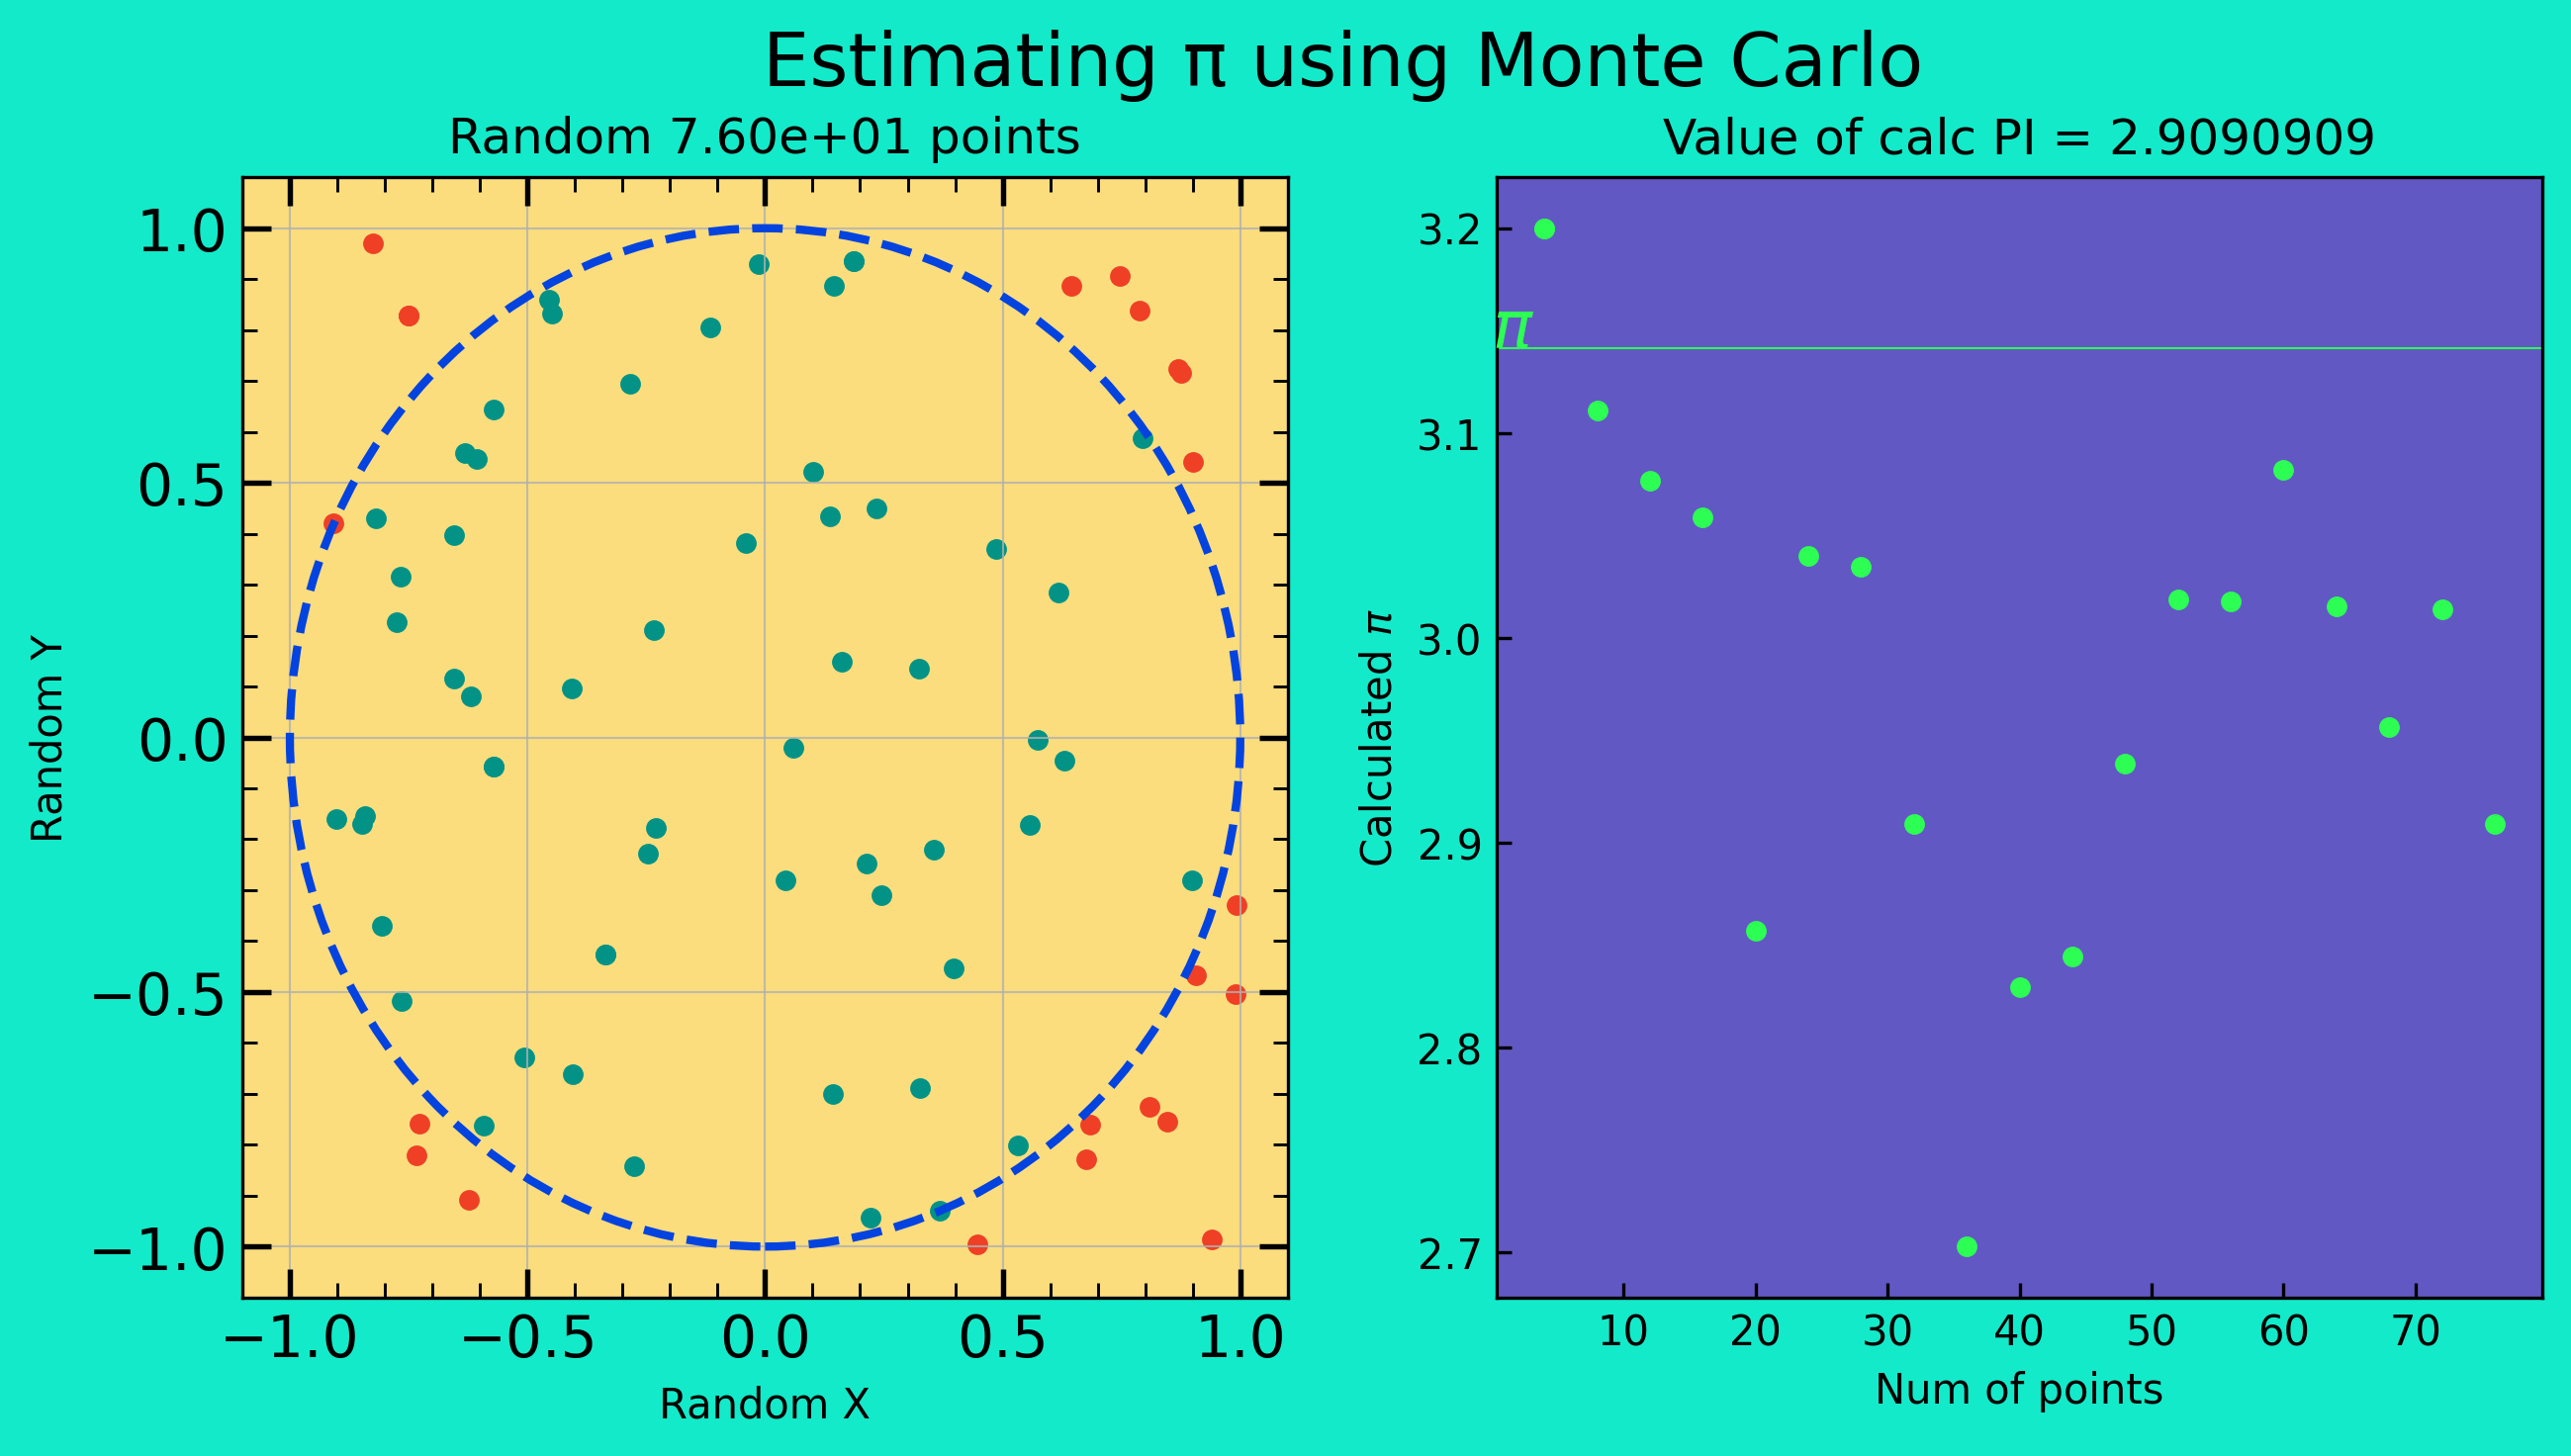

In [3]:
%%time
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5), dpi=300, facecolor='xkcd:aqua')
spp(ax_obj=ax1, xticks=(0.5,0.1), yticks=(0.5,0.1))

#Basic Plot Setup
circle = plt.Circle((0, 0), 1, color='xkcd:blue', fill=False, ls='--', lw=2.0, zorder=12)
ax1.add_patch(circle)
ax2.axhline(y=np.pi, color='xkcd:bright light green')
ax1.set_facecolor('xkcd:wheat')
ax2.set_facecolor('xkcd:iris')
ax2.tick_params('both', direction='in')
ax1.set_xlabel('Random X')
ax1.set_ylabel('Random Y')
ax2.set_xlabel('Num of points')
ax2.set_ylabel(r'Calculated $\pi$')
ax2.text(x=0, y=np.pi, s= r"$\pi$", color='xkcd:bright light green', fontsize=16)
fig.suptitle(f"Estimating \u03C0 using Monte Carlo ", fontsize=18)


def pi_calc(i):
    x = df['x'][i*4:i*4+4]
    y = df['y'][i*4:i*4+4]
    
    for a, b in zip(x.values, y.values):
        if circ(a, b) <= 1:
            ax1.scatter(a, b, color='xkcd:teal')
            ax1.set_title(f"Random {i*4:.2e} points", fontsize=12)

        else:
            ax1.scatter(a, b, color='xkcd:tomato')
            ax1.set_title(f"Random {i*4:.2e} points", fontsize=12)

    PI = df['PI'][i*4]
    ax2.scatter(i*4, PI, color='xkcd:bright light green', ls='-')
    ax2.set_title(f"Value of calc PI = {PI:0.7f}",  fontsize=12)

anim = FuncAnimation(fig, pi_calc,frames=range(1,20), interval=40) #increase upper limit in range 
                                                                    #to 250 for complete run

# anim.save('pi_estimate_test.mp4', fps=60, writer='ffmpeg') #if ffmpeg is there uncomment this line
anim.save('pi_estimate_test.gif', fps=60, writer='pillow')